In [240]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import matplotlib as mpl
import statsmodels.api as sm
import cycler

In [237]:

#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['magenta', 'yellow','turquoise', 'salmon'])

In [328]:
n = 20
color = plt.cm.winter(np.linspace(0, 1,n))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

## pyEDM documentation here: https://github.com/SugiharaLab/pyEDM/blob/master/doc/pyEDM.pdf

* E = data dimension
* Tp = prediction interval
* knn = number nearest neighbors
* tau = embedding delay
* theta = Smap localization


# Examples 

In [ ]:
pyEDM.Examples()

# Load Data

In [329]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'



In [330]:
Dekad = pd.Series(list(range(19,37)) + list(range(1,37))*14)

In [343]:
#View dataset
oromia_croplands_ts = pd.read_csv(OROMIA_TS_DIR + 'oromia_croplands_df_normalized.csv',index_col=False)
oromia_croplands_ts = oromia_croplands_ts.rename(columns={'DT':'Time'})
oromia_croplands_ts.Time = pd.to_datetime(oromia_croplands_ts['Time'])
oromia_croplands_ts.insert(1, 'Dekad', pd.Series(list(range(19,37)) + list(range(1,37))*14))
#oromia_croplands_ts = oromia_croplands_ts.set_index(oromia_croplands_ts['Time'])
#oromia_croplands_ts = oromia_croplands_ts.set_index(pd.DatetimeIndex(oromia_croplands_ts['Time']))
oromia_croplands_ts['Year'], oromia_croplands_ts['Month'] = oromia_croplands_ts['Time'].dt.year, oromia_croplands_ts['Time'].dt.month
#oromia_croplands_ts = oromia_croplands_ts.drop(columns='Time')

# , oromia_cropland_ts.Month

In [344]:
oromia_croplands_ts

,Time,Dekad,SM,TMP,P,LST,NDVI,PET,Year,Month
0,2002-07-01,19,0.135646,0.052480,0.742506,0.037586,-0.083077,0.056306,2002,7
1,2002-07-11,20,0.544381,-0.904232,0.831454,-0.684467,-0.026029,-0.777299,2002,7
2,2002-07-21,21,1.024050,-1.651244,2.282451,-0.969916,0.021414,-0.294196,2002,7
3,2002-08-01,22,1.238326,-1.839325,1.355295,-1.152511,0.281149,-1.135613,2002,8
4,2002-08-11,23,1.272390,-1.681766,1.303809,-1.152511,0.749501,-0.960297,2002,8
...,...,...,...,...,...,...,...,...,...,...
517,2016-11-11,32,-0.607893,-0.185363,-0.930699,-0.009177,0.314271,-0.206690,2016,11
518,2016-11-21,33,-0.689993,-0.117030,-0.758587,-0.407309,-0.025562,-1.129312,2016,11
519,2016-12-01,34,-0.820439,-0.639136,-0.966702,0.231113,-0.288986,-0.521770,2016,12
520,2016-12-11,35,-1.135127,-0.063027,-0.979032,0.386684,-0.505438,-0.371977,2016,12


In [345]:
oromia_croplands_years = oromia_croplands_ts.groupby('Year')

Text(0.5, 0.98, 'Oromia Environmental Parameters By Year Normalized')

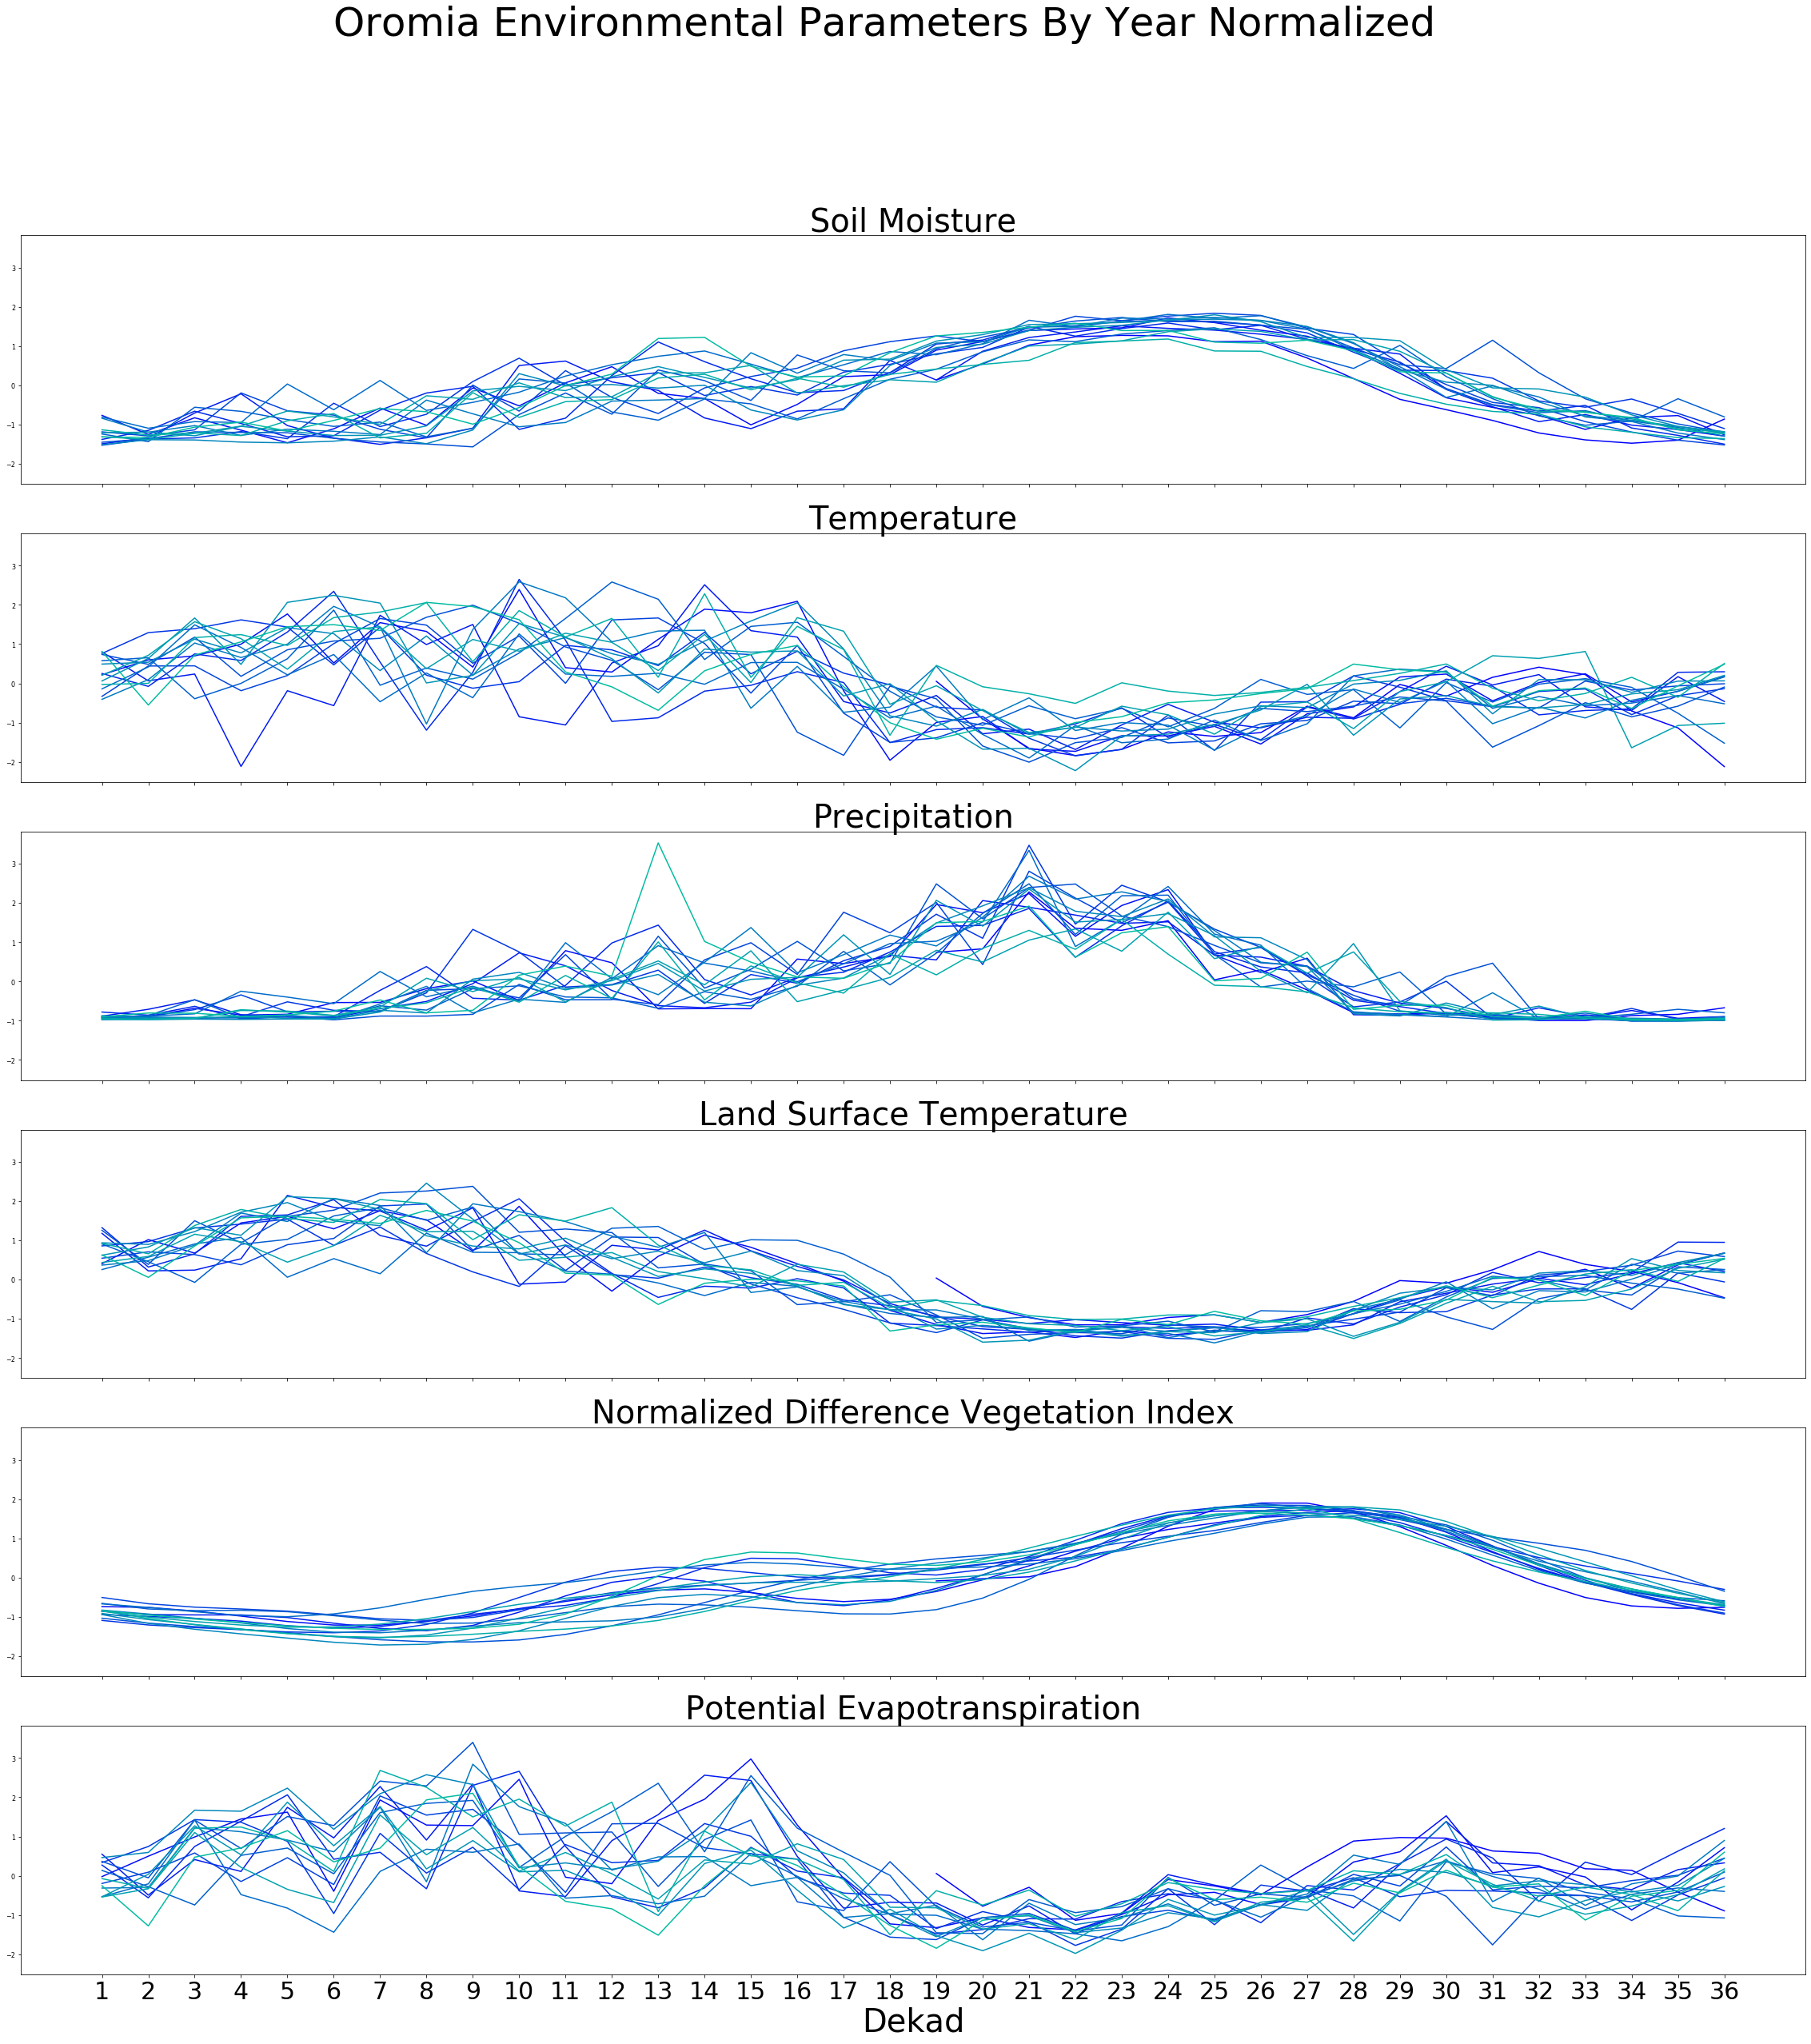

In [405]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,sharex=True,sharey=True,figsize=(40,40))
for label, df in oromia_croplands_years:
    year_group = oromia_croplands_years.get_group(label)
    ax1.plot(oromia_croplands_years.get_group(label).Dekad, oromia_croplands_years.get_group(label).SM, label = label)
    ax1.set_title('Soil Moisture', fontsize = 40)
    #ax1.legend(loc = 'upper right', ncol = 2, fontsize = 8)
    ax2.plot(oromia_croplands_years.get_group(label).Dekad, oromia_croplands_years.get_group(label).TMP, label = label)
    ax2.set_title('Temperature', fontsize = 40)
    ax3.plot(oromia_croplands_years.get_group(label).Dekad, oromia_croplands_years.get_group(label).P, label = label)
    ax3.set_title('Precipitation', fontsize = 40)
    ax4.plot(oromia_croplands_years.get_group(label).Dekad, oromia_croplands_years.get_group(label).LST, label = label)
    ax4.set_title('Land Surface Temperature', fontsize = 40)
    ax5.plot(oromia_croplands_years.get_group(label).Dekad, oromia_croplands_years.get_group(label).NDVI, label = label)
    ax5.set_title('Normalized Difference Vegetation Index', fontsize = 40)
    ax6.plot(oromia_croplands_years.get_group(label).Dekad, oromia_croplands_years.get_group(label).PET, label = label)
    ax6.set_title('Potential Evapotranspiration', fontsize = 40)
        
plt.xticks(np.arange(1,37,1), fontsize = 30)
#fig.yticks(fontsize = 30)
plt.xlabel('Dekad', fontsize = 40)
fig.suptitle('Oromia Environmental Parameters By Year Normalized', fontsize = 50)
#plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)
#plt.subplots_adjust(hspace=0.3)


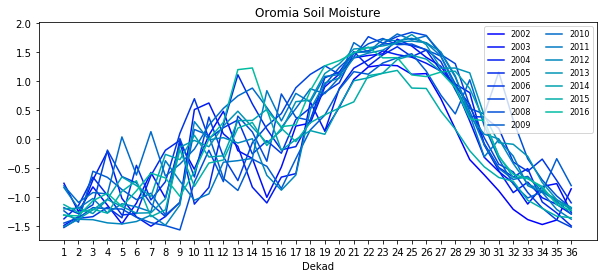

In [347]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).Dekad, oromia_croplands_years.get_group(2002).SM, label = '2002')
ax.plot(oromia_croplands_years.get_group(2003).Dekad, oromia_croplands_years.get_group(2003).SM, label = '2003')
ax.plot(oromia_croplands_years.get_group(2004).Dekad, oromia_croplands_years.get_group(2004).SM, label = '2004')
ax.plot(oromia_croplands_years.get_group(2005).Dekad, oromia_croplands_years.get_group(2005).SM, label = '2005')
ax.plot(oromia_croplands_years.get_group(2006).Dekad, oromia_croplands_years.get_group(2006).SM, label = '2006')
ax.plot(oromia_croplands_years.get_group(2007).Dekad, oromia_croplands_years.get_group(2007).SM, label = '2007')
ax.plot(oromia_croplands_years.get_group(2008).Dekad, oromia_croplands_years.get_group(2008).SM, label = '2008')
ax.plot(oromia_croplands_years.get_group(2009).Dekad, oromia_croplands_years.get_group(2009).SM, label = '2009')
ax.plot(oromia_croplands_years.get_group(2010).Dekad, oromia_croplands_years.get_group(2010).SM, label = '2010')
ax.plot(oromia_croplands_years.get_group(2011).Dekad, oromia_croplands_years.get_group(2011).SM, label = '2011')
ax.plot(oromia_croplands_years.get_group(2012).Dekad, oromia_croplands_years.get_group(2012).SM, label = '2012')
ax.plot(oromia_croplands_years.get_group(2013).Dekad, oromia_croplands_years.get_group(2013).SM, label = '2013')
ax.plot(oromia_croplands_years.get_group(2014).Dekad, oromia_croplands_years.get_group(2014).SM, label = '2014')
ax.plot(oromia_croplands_years.get_group(2015).Dekad, oromia_croplands_years.get_group(2015).SM, label = '2015')
ax.plot(oromia_croplands_years.get_group(2016).Dekad, oromia_croplands_years.get_group(2016).SM, label = '2016')
plt.xticks(np.arange(1,37,1))
plt.xlabel('Dekad')
plt.title('Oromia Soil Moisture')
plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)


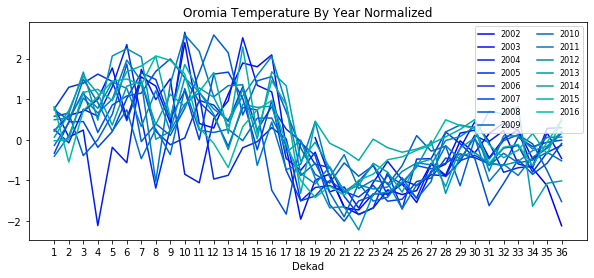

In [348]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).Dekad, oromia_croplands_years.get_group(2002).TMP, label = '2002')
ax.plot(oromia_croplands_years.get_group(2003).Dekad, oromia_croplands_years.get_group(2003).TMP, label = '2003')
ax.plot(oromia_croplands_years.get_group(2004).Dekad, oromia_croplands_years.get_group(2004).TMP, label = '2004')
ax.plot(oromia_croplands_years.get_group(2005).Dekad, oromia_croplands_years.get_group(2005).TMP, label = '2005')
ax.plot(oromia_croplands_years.get_group(2006).Dekad, oromia_croplands_years.get_group(2006).TMP, label = '2006')
ax.plot(oromia_croplands_years.get_group(2007).Dekad, oromia_croplands_years.get_group(2007).TMP, label = '2007')
ax.plot(oromia_croplands_years.get_group(2008).Dekad, oromia_croplands_years.get_group(2008).TMP, label = '2008')
ax.plot(oromia_croplands_years.get_group(2009).Dekad, oromia_croplands_years.get_group(2009).TMP, label = '2009')
ax.plot(oromia_croplands_years.get_group(2010).Dekad, oromia_croplands_years.get_group(2010).TMP, label = '2010')
ax.plot(oromia_croplands_years.get_group(2011).Dekad, oromia_croplands_years.get_group(2011).TMP, label = '2011')
ax.plot(oromia_croplands_years.get_group(2012).Dekad, oromia_croplands_years.get_group(2012).TMP, label = '2012')
ax.plot(oromia_croplands_years.get_group(2013).Dekad, oromia_croplands_years.get_group(2013).TMP, label = '2013')
ax.plot(oromia_croplands_years.get_group(2014).Dekad, oromia_croplands_years.get_group(2014).TMP, label = '2014')
ax.plot(oromia_croplands_years.get_group(2015).Dekad, oromia_croplands_years.get_group(2015).TMP, label = '2015')
ax.plot(oromia_croplands_years.get_group(2016).Dekad, oromia_croplands_years.get_group(2016).TMP, label = '2016')
plt.xticks(np.arange(1,37,1))
plt.xlabel('Dekad')
plt.title('Oromia Temperature By Year Normalized')
plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)


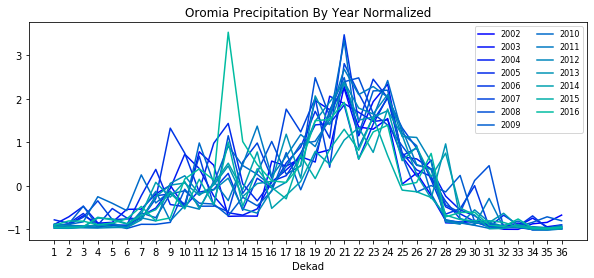

In [349]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).Dekad, oromia_croplands_years.get_group(2002).P, label = '2002')
ax.plot(oromia_croplands_years.get_group(2003).Dekad, oromia_croplands_years.get_group(2003).P, label = '2003')
ax.plot(oromia_croplands_years.get_group(2004).Dekad, oromia_croplands_years.get_group(2004).P, label = '2004')
ax.plot(oromia_croplands_years.get_group(2005).Dekad, oromia_croplands_years.get_group(2005).P, label = '2005')
ax.plot(oromia_croplands_years.get_group(2006).Dekad, oromia_croplands_years.get_group(2006).P, label = '2006')
ax.plot(oromia_croplands_years.get_group(2007).Dekad, oromia_croplands_years.get_group(2007).P, label = '2007')
ax.plot(oromia_croplands_years.get_group(2008).Dekad, oromia_croplands_years.get_group(2008).P, label = '2008')
ax.plot(oromia_croplands_years.get_group(2009).Dekad, oromia_croplands_years.get_group(2009).P, label = '2009')
ax.plot(oromia_croplands_years.get_group(2010).Dekad, oromia_croplands_years.get_group(2010).P, label = '2010')
ax.plot(oromia_croplands_years.get_group(2011).Dekad, oromia_croplands_years.get_group(2011).P, label = '2011')
ax.plot(oromia_croplands_years.get_group(2012).Dekad, oromia_croplands_years.get_group(2012).P, label = '2012')
ax.plot(oromia_croplands_years.get_group(2013).Dekad, oromia_croplands_years.get_group(2013).P, label = '2013')
ax.plot(oromia_croplands_years.get_group(2014).Dekad, oromia_croplands_years.get_group(2014).P, label = '2014')
ax.plot(oromia_croplands_years.get_group(2015).Dekad, oromia_croplands_years.get_group(2015).P, label = '2015')
ax.plot(oromia_croplands_years.get_group(2016).Dekad, oromia_croplands_years.get_group(2016).P, label = '2016')
plt.xticks(np.arange(1,37,1))
plt.title('Oromia Precipitation By Year Normalized')
plt.xlabel('Dekad')
plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)

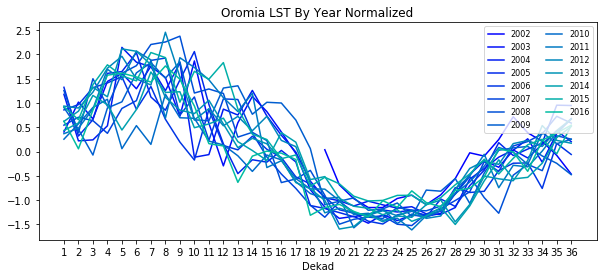

In [350]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).Dekad, oromia_croplands_years.get_group(2002).LST, label = '2002')
ax.plot(oromia_croplands_years.get_group(2003).Dekad, oromia_croplands_years.get_group(2003).LST, label = '2003')
ax.plot(oromia_croplands_years.get_group(2004).Dekad, oromia_croplands_years.get_group(2004).LST, label = '2004')
ax.plot(oromia_croplands_years.get_group(2005).Dekad, oromia_croplands_years.get_group(2005).LST, label = '2005')
ax.plot(oromia_croplands_years.get_group(2006).Dekad, oromia_croplands_years.get_group(2006).LST, label = '2006')
ax.plot(oromia_croplands_years.get_group(2007).Dekad, oromia_croplands_years.get_group(2007).LST, label = '2007')
ax.plot(oromia_croplands_years.get_group(2008).Dekad, oromia_croplands_years.get_group(2008).LST, label = '2008')
ax.plot(oromia_croplands_years.get_group(2009).Dekad, oromia_croplands_years.get_group(2009).LST, label = '2009')
ax.plot(oromia_croplands_years.get_group(2010).Dekad, oromia_croplands_years.get_group(2010).LST, label = '2010')
ax.plot(oromia_croplands_years.get_group(2011).Dekad, oromia_croplands_years.get_group(2011).LST, label = '2011')
ax.plot(oromia_croplands_years.get_group(2012).Dekad, oromia_croplands_years.get_group(2012).LST, label = '2012')
ax.plot(oromia_croplands_years.get_group(2013).Dekad, oromia_croplands_years.get_group(2013).LST, label = '2013')
ax.plot(oromia_croplands_years.get_group(2014).Dekad, oromia_croplands_years.get_group(2014).LST, label = '2014')
ax.plot(oromia_croplands_years.get_group(2015).Dekad, oromia_croplands_years.get_group(2015).LST, label = '2015')
ax.plot(oromia_croplands_years.get_group(2016).Dekad, oromia_croplands_years.get_group(2016).LST, label = '2016')
plt.xticks(np.arange(1,37,1))
plt.title('Oromia LST By Year Normalized')
plt.xlabel('Dekad')
plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)

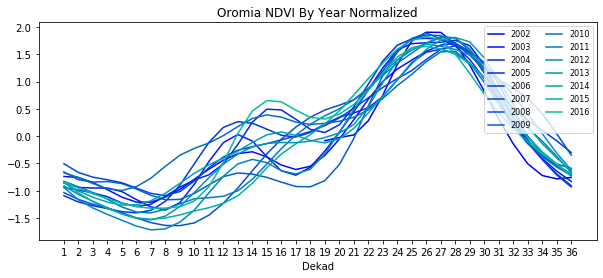

In [351]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).Dekad, oromia_croplands_years.get_group(2002).NDVI, label = '2002')
ax.plot(oromia_croplands_years.get_group(2003).Dekad, oromia_croplands_years.get_group(2003).NDVI, label = '2003')
ax.plot(oromia_croplands_years.get_group(2004).Dekad, oromia_croplands_years.get_group(2004).NDVI, label = '2004')
ax.plot(oromia_croplands_years.get_group(2005).Dekad, oromia_croplands_years.get_group(2005).NDVI, label = '2005')
ax.plot(oromia_croplands_years.get_group(2006).Dekad, oromia_croplands_years.get_group(2006).NDVI, label = '2006')
ax.plot(oromia_croplands_years.get_group(2007).Dekad, oromia_croplands_years.get_group(2007).NDVI, label = '2007')
ax.plot(oromia_croplands_years.get_group(2008).Dekad, oromia_croplands_years.get_group(2008).NDVI, label = '2008')
ax.plot(oromia_croplands_years.get_group(2009).Dekad, oromia_croplands_years.get_group(2009).NDVI, label = '2009')
ax.plot(oromia_croplands_years.get_group(2010).Dekad, oromia_croplands_years.get_group(2010).NDVI, label = '2010')
ax.plot(oromia_croplands_years.get_group(2011).Dekad, oromia_croplands_years.get_group(2011).NDVI, label = '2011')
ax.plot(oromia_croplands_years.get_group(2012).Dekad, oromia_croplands_years.get_group(2012).NDVI, label = '2012')
ax.plot(oromia_croplands_years.get_group(2013).Dekad, oromia_croplands_years.get_group(2013).NDVI, label = '2013')
ax.plot(oromia_croplands_years.get_group(2014).Dekad, oromia_croplands_years.get_group(2014).NDVI, label = '2014')
ax.plot(oromia_croplands_years.get_group(2015).Dekad, oromia_croplands_years.get_group(2015).NDVI, label = '2015')
ax.plot(oromia_croplands_years.get_group(2016).Dekad, oromia_croplands_years.get_group(2016).NDVI, label = '2016')
plt.xticks(np.arange(1,37,1))
plt.title('Oromia NDVI By Year Normalized')
plt.xlabel('Dekad')
plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)

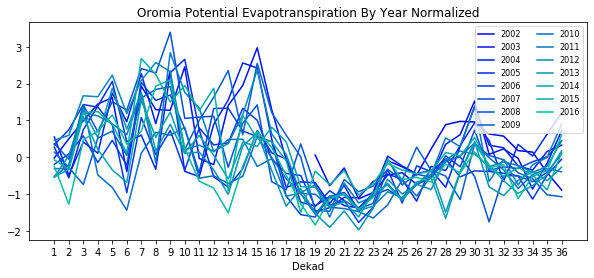

In [352]:
fig = plt.figure(figsize = (10,4))
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).Dekad, oromia_croplands_years.get_group(2002).PET, label = '2002')
ax.plot(oromia_croplands_years.get_group(2003).Dekad, oromia_croplands_years.get_group(2003).PET, label = '2003')
ax.plot(oromia_croplands_years.get_group(2004).Dekad, oromia_croplands_years.get_group(2004).PET, label = '2004')
ax.plot(oromia_croplands_years.get_group(2005).Dekad, oromia_croplands_years.get_group(2005).PET, label = '2005')
ax.plot(oromia_croplands_years.get_group(2006).Dekad, oromia_croplands_years.get_group(2006).PET, label = '2006')
ax.plot(oromia_croplands_years.get_group(2007).Dekad, oromia_croplands_years.get_group(2007).PET, label = '2007')
ax.plot(oromia_croplands_years.get_group(2008).Dekad, oromia_croplands_years.get_group(2008).PET, label = '2008')
ax.plot(oromia_croplands_years.get_group(2009).Dekad, oromia_croplands_years.get_group(2009).PET, label = '2009')
ax.plot(oromia_croplands_years.get_group(2010).Dekad, oromia_croplands_years.get_group(2010).PET, label = '2010')
ax.plot(oromia_croplands_years.get_group(2011).Dekad, oromia_croplands_years.get_group(2011).PET, label = '2011')
ax.plot(oromia_croplands_years.get_group(2012).Dekad, oromia_croplands_years.get_group(2012).PET, label = '2012')
ax.plot(oromia_croplands_years.get_group(2013).Dekad, oromia_croplands_years.get_group(2013).PET, label = '2013')
ax.plot(oromia_croplands_years.get_group(2014).Dekad, oromia_croplands_years.get_group(2014).PET, label = '2014')
ax.plot(oromia_croplands_years.get_group(2015).Dekad, oromia_croplands_years.get_group(2015).PET, label = '2015')
ax.plot(oromia_croplands_years.get_group(2016).Dekad, oromia_croplands_years.get_group(2016).PET, label = '2016')
plt.xticks(np.arange(1,37,1))
plt.title('Oromia Potential Evapotranspiration By Year Normalized')
plt.xlabel('Dekad')
plt.legend(loc = 'upper right', ncol = 2, fontsize = 8)

In [353]:
oromia_croplands_years.get_group(2002)

,Time,Dekad,SM,TMP,P,LST,NDVI,PET,Year,Month
0,2002-07-01,19,0.135646,0.052480,0.742506,0.037586,-0.083077,0.056306,2002,7
1,2002-07-11,20,0.544381,-0.904232,0.831454,-0.684467,-0.026029,-0.777299,2002,7
2,2002-07-21,21,1.024050,-1.651244,2.282451,-0.969916,0.021414,-0.294196,2002,7
3,2002-08-01,22,1.238326,-1.839325,1.355295,-1.152511,0.281149,-1.135613,2002,8
4,2002-08-11,23,1.272390,-1.681766,1.303809,-1.152511,0.749501,-0.960297,2002,8
5,2002-08-21,24,1.259830,-1.236181,1.548571,-0.966168,1.309556,-0.096335,2002,8
6,2002-09-01,25,1.112078,-1.351604,0.040852,-0.898070,1.741075,-0.260718,2002,9
7,2002-09-11,26,1.124257,-1.253737,0.295577,-1.092580,1.901580,-0.486395,2002,9
8,2002-09-21,27,0.695844,-0.581666,-0.215749,-0.891801,1.899045,0.224428,2002,9
9,2002-10-01,28,0.172071,-0.876779,-0.795520,-0.555461,1.682296,0.883219,2002,10


In [191]:
oromia_croplands_years.get_group(2002)

,Time,SM,TMP,P,LST,NDVI,PET,Year,Month
0,2002-07-01,0.135646,0.052480,0.037586,31.801708,-0.083077,0.056306,2002,7
1,2002-07-11,0.544381,-0.904232,-0.684467,27.760001,-0.026029,-0.777299,2002,7
2,2002-07-21,1.024050,-1.651244,-0.969916,26.162196,0.021414,-0.294196,2002,7
3,2002-08-01,1.238326,-1.839325,-1.152511,25.140116,0.281149,-1.135613,2002,8
4,2002-08-11,1.272390,-1.681766,-1.152511,25.140116,0.749501,-0.960297,2002,8
5,2002-08-21,1.259830,-1.236181,-0.966168,26.183176,1.309556,-0.096335,2002,8
6,2002-09-01,1.112078,-1.351604,-0.898070,26.564353,1.741075,-0.260718,2002,9
7,2002-09-11,1.124257,-1.253737,-1.092580,25.475580,1.901580,-0.486395,2002,9
8,2002-09-21,0.695844,-0.581666,-0.891801,26.599445,1.899045,0.224428,2002,9
9,2002-10-01,0.172071,-0.876779,-0.555461,28.482114,1.682296,0.883219,2002,10


In [177]:
list(range(19,37))

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

In [170]:
oromia_croplands_years.get_group(2002).reset_index()

,Time,SM,TMP,P,LST,NDVI,PET,Year,Month
0,2002-07-01,0.135646,0.052480,0.037586,31.801708,-0.083077,0.056306,2002,7
1,2002-07-11,0.544381,-0.904232,-0.684467,27.760001,-0.026029,-0.777299,2002,7
2,2002-07-21,1.024050,-1.651244,-0.969916,26.162196,0.021414,-0.294196,2002,7
3,2002-08-01,1.238326,-1.839325,-1.152511,25.140116,0.281149,-1.135613,2002,8
4,2002-08-11,1.272390,-1.681766,-1.152511,25.140116,0.749501,-0.960297,2002,8
5,2002-08-21,1.259830,-1.236181,-0.966168,26.183176,1.309556,-0.096335,2002,8
6,2002-09-01,1.112078,-1.351604,-0.898070,26.564353,1.741075,-0.260718,2002,9
7,2002-09-11,1.124257,-1.253737,-1.092580,25.475580,1.901580,-0.486395,2002,9
8,2002-09-21,0.695844,-0.581666,-0.891801,26.599445,1.899045,0.224428,2002,9
9,2002-10-01,0.172071,-0.876779,-0.555461,28.482114,1.682296,0.883219,2002,10


AttributeError: 'function' object has no attribute 'index'

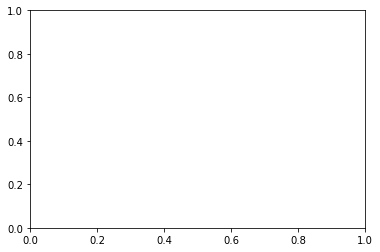

In [169]:
fig = plt.figure()
ax = plt.axes()
ax.plot(oromia_croplands_years.get_group(2002).reset_index.index, oromia_croplands_years.get_group(2002).SM)
#oromia_croplands_years.get_group(2003).SM.plot()
#oromia_croplands_years.get_group(2004).SM.plot()

In [ ]:
classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()


In [ ]:
fig = sm.graphics.tsa.month_plot(dta)

In [ ]:
dta = sm.datasets.elnino.load_pandas().data
dta

In [ ]:
dta['YEAR'] = dta.YEAR.astype(int).astype(str)
dta = dta.set_index('YEAR').T.unstack()

In [ ]:
dates = pd.to_datetime(list(map(lambda x: '-'.join(x) + '-1',
...                              dta.index.values)))

In [ ]:
dta.index = pd.DatetimeIndex(dates, freq='MS')
dta

In [ ]:
fig = sm.graphics.tsa.month_plot(dta)

In [ ]:
dta

# 1) find optimal embedding dimension
## specify library and prediction size, columns and target

In [ ]:
oromia_barren_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_barren_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_barren_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_barren_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_barren_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_barren_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)


In [ ]:
oromia_closedshrublands_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_closedshrublands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_closedshrublands_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_closedshrublands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_closedshrublands_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_closedshrublands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_closedshrublands_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_closedshrublands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_closedshrublands_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_closedshrublands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_closedshrublands_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_closedshrublands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)

In [ ]:
oromia_cropland_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_cropland_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_cropland_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_cropland_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_cropland_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_cropland_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)


In [ ]:
oromia_cropnatveg_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_cropnatveg_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_cropnatveg_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_cropnatveg_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_cropnatveg_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_cropnatveg_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_cropnatveg_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_cropnatveg_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_cropnatveg_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_cropnatveg_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_cropnatveg_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_cropnatveg_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)

In [ ]:
oromia_deciduousbroad_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_deciduousbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_deciduousbroad_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_deciduousbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_deciduousbroad_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_deciduousbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_deciduousbroad_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_deciduousbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_deciduousbroad_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_deciduousbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_deciduousbroad_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_deciduousbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)

In [ ]:
oromia_evergreenbroad_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_evergreenbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_evergreenbroad_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_evergreenbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_evergreenbroad_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_evergreenbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_evergreenbroad_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_evergreenbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_evergreenbroad_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_evergreenbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_evergreenbroad_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_evergreenbroad_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)

In [ ]:
oromia_grasslands_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_grasslands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_grasslands_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_grasslands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_grasslands_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_grasslands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_grasslands_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_grasslands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_grasslands_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_grasslands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_grasslands_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_grasslands_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)

In [ ]:
oromia_savannas_ed_sm = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'SM', showPlot = False)
oromia_savannas_ed_tmp = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'TMP', showPlot = False)
oromia_savannas_ed_p = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'P', showPlot = False)
oromia_savannas_ed_lst = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'LST', showPlot = False)
oromia_savannas_ed_ndvi = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'NDVI', showPlot = False)
oromia_savannas_ed_pet = EmbedDimension(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_normalized.csv', lib = '1 100', pred = '101 500', columns = 'PET', showPlot = False)

In [ ]:
#find max rho and E 
#must change variables twice 

oromia_savannas_ed_pet.iloc[oromia_savannas_ed_pet['rho'].idxmax()]




In [ ]:
oromia_evergreenbroad_ed_sm

# 2) Predict Interval

In [ ]:
df = PredictInterval(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = "1 100", pred = '201 500', E = 10, columns = 'SM', showPlot = True)





In [ ]:
df = PredictNonlinear(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', lib = "1 100", pred = '201 500', E = 10, columns = 'SM', showPlot = True)



In [ ]:
ComputeError

In [ ]:
PredictInterval

In [ ]:
sampleData['block_3sp']

In [ ]:
df = Simplex(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_barren_df_normalized.csv', lib = '1 100', pred = '101 500', E = 10, columns = 'SM', target = 'SM', showPlot = True)


In [ ]:
pd.to_datetime(df.Time)

In [ ]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(pd.to_datetime(df.Time), df.Observations)
ax.plot(pd.to_datetime(df.Time), df.Predictions)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# datemin = np.datetime64(df['Time'][0], 'Y')
# datemax = np.datetime64(df['Time'][-1], 'Y') + np.timedelta64(1, 'Y')
# ax.set_xlim(datemin, datemax)

fig.autofmt_xdate()
plt.show()


In [ ]:
df = Embed(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_croplands_df_normalized.csv', E = 4, tau = 2, columns = 'P', verbose = True)

In [ ]:
oromia_croplands.head(10)

In [ ]:
df.head()